In [1]:
from sciSOM import *
import pandas as pd
import numpy as np
import random
from scipy.spatial.distance import cdist

In [2]:
# Lets try to change the data:/
n_samples = 2000  # Total number of samples
centers = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])  # Centers of the 4 Gaussian distributions
std_dev = 0.1  # Standard deviation of the Gaussian distributions
n_centers = len(centers)
samples_per_center = n_samples // n_centers

data = []
for center in centers:
    samples = np.random.normal(loc=center, scale=std_dev, size=(samples_per_center, 2))
    data.append(samples)

# Combine all samples into a single array
gaussian_data_4_classes = np.vstack(data)

gaussian_data_4_classes_norm = affine_transform(gaussian_data_4_classes, -1, 1)


In [3]:
# Lets make a simple dataset which we understand
# I will generate 4 data classes centered at 1,1 1,2 2,1 2,2
# Add some gaussian noise to each of those classes and see
# If the SOM was able to separate them!
n_samples = 2000  # Total number of samples
centers = np.array([[1, 1], [1, 2], [2, 1], [2, 2]])  # Centers of the 4 Gaussian distributions
std_dev = 0.1  # Standard deviation of the Gaussian distributions
n_centers = len(centers)
samples_per_center = n_samples // n_centers

In [4]:
data = []
for center in centers:
    samples = np.random.normal(loc=center, scale=std_dev, size=(samples_per_center, 2))
    data.append(samples)

# Combine all samples into a single array
gaussian_data_4_classes = np.vstack(data)

In [5]:
gaussian_data_4_classes_norm = affine_transform(gaussian_data_4_classes, 0, 1)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from typing import Union

def plot_SOM_gird_neurons(weight_cube):
    """
    This function take in a nunr file from NeuroScope and converts it into a useful format to us
    Then it uses the data in the nunr file to identify which data samples belong to each PE
    Finally it takes this data and plots it such that we can overlay any data we want.

    input_data:      waveforms (peaks, peaklets)
    grid_x_dim:      SOM x-dimension [list of x dim per sample]
    grid_y_dim:      SOM y-dimension [same as above]
    x_dim_data_cube: x-dimension of the input data cube for the SOM
    output_img:      name of file to save the image to
    is_struct_array: does the data need to be accessed as peaks['data']?
    """
    
    xgrid, ygrid, data_dim = np.shape(weight_cube)
    
    # Plotting section
    fig, ax = plt.subplots(nrows=ygrid, ncols=xgrid, figsize=(5, 5))

    a = 1
    for i in np.arange(ygrid):
        for j in np.arange(xgrid):
            ax[j,i].plot(weight_cube[j,i,:])
            ax[i,j].axis('off')
            ax[i,j].set_xlim(0, data_dim)
            ax[i,j].set_ylim(0, 1)

In [7]:
dtype = np.dtype([
    ('time', 'i8'),  # Unicode string of max length 10
    ('alpha', 'float'),    # 4-byte integer
    ('beta', 'float'),  # 4-byte float
    ('gamma', 'float')
])

In [8]:
dtypek = np.dtype([
    ('time', 'i8'),  # Unicode string of max length 10
    ('alpha', 'float'),    # 4-byte integer
    ('sigma', 'float'),  # 4-byte float
    ('max_radius', 'i4')
])

In [9]:
parameters = np.zeros(1, dtype=dtype)
parameters_schedule = np.zeros(4, dtype=dtype)
#parameters_schedule[0] = (2000, 0.3, 0.2, 3)
#parameters_schedule[1] = (8000, 0.07, 0.1, 2)
#parameters_schedule[2] = (20000, 0.07, 0.1, 2)

In [10]:
ksom_parm = np.zeros(3, dtype = dtypek)

In [11]:
ksom_parm[0] = (2000, 0.3, 0.3, 3)
ksom_parm[1] = (8000, 0.1, 0.3, 2)
ksom_parm[2] = (20000, 0.05, 0.3, 1)

In [12]:
parameters[0] = (0, 0.4, 0.04, 0.3)

In [61]:
parameters_schedule[0] = (2000, 0.3, 0.001, 0.3)
parameters_schedule[1] = (8000, 0.05, 0.0005, 0.08)
parameters_schedule[2] = (20000, 0.01, 0.0001, 0.03)
parameters_schedule[3] = (100000, 0.005, 0.00005, 0.01)

In [62]:
som_model_simple = SOM(x_dim = 7, y_dim = 7, input_dim = 2, n_iter=20000,
                       learning_parameters=parameters_schedule,
                       som_type = "cSOM", #neighborhood_decay='exponential',
                       decay_type='schedule', mode = "batch", #neighborhood_decay = "none",#"geometric_series"
                       save_weight_cube_history=True,
                       #gamma_off=True
                      )

In [63]:
som_model_simple.train(gaussian_data_4_classes_norm)

In [64]:
som_model_simple.weight_cube_history

array([[ 548.,  197.,   41.,  589.,  613.,  561., 1039.],
       [ 407.,  158.,   35.,    0.,   32.,  519.,  599.],
       [ 506.,   19.,  596.,  808.,  307.,    8.,  529.],
       [ 308.,   26.,  315.,  391.,  802.,   22.,   53.],
       [ 455.,  142.,  269.,  714.,  244.,   28.,  700.],
       [ 418.,  276.,   12.,   24.,  155.,  448.,  563.],
       [ 725.,  266.,   30., 2566.,  595.,  438.,  904.]])

In [17]:
test

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [18]:
test[0:5, 0:3]

array([[ 0,  1,  2],
       [ 5,  6,  7],
       [10, 11, 12],
       [15, 16, 17],
       [20, 21, 22]])

In [19]:
som_model_simple.weight_cube[:,:,0]

array([[0.83778045, 0.81145756, 0.72551505, 0.46690266, 0.22928203,
        0.17337534, 0.16565781],
       [0.81940308, 0.80992126, 0.72494551, 0.46000836, 0.22443883,
        0.17427694, 0.1682533 ],
       [0.74514594, 0.73714993, 0.66669199, 0.41809332, 0.23397708,
        0.1890384 , 0.1867031 ],
       [0.4646907 , 0.4589004 , 0.39526869, 0.34295888, 0.34070497,
        0.32935142, 0.32818819],
       [0.25824024, 0.25452705, 0.29990441, 0.35924419, 0.60556438,
        0.68691594, 0.69345843],
       [0.18087871, 0.19398352, 0.24638518, 0.3910624 , 0.67837614,
        0.79942991, 0.81000196],
       [0.16533   , 0.18993667, 0.24776773, 0.39408975, 0.68951606,
        0.80711639, 0.82907813]])

In [20]:
som_model_simple.track_radius_limits

array([[0., 0., 0., ..., 0., 0., 0.],
       [5., 3., 4., ..., 3., 3., 3.],
       [0., 0., 2., ..., 4., 4., 4.],
       [4., 3., 7., ..., 7., 7., 7.]])

In [21]:
som_model_simple.track_mbu

array([[2., 0., 1., ..., 0., 0., 0.],
       [1., 0., 4., ..., 6., 6., 6.]])

In [25]:
som_model_simple.save_neighborhood_function[:,:,0]

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0.5, 0.5, 0. , 0. ],
       [0. , 0. , 0.5, 1. , 0.5, 0. , 0. ]])

In [33]:
som_model_simple.save_neighborhood_function[:,:,8]

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0.5, 0.5, 0. , 0. , 0. ],
       [0. , 0.5, 1. , 0.5, 0. , 0. , 0. ],
       [0. , 0.5, 0.5, 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [66]:
supression_mat_vector = som_model_simple.suppresion_matrix_history.reshape(7*7,(som_model_simple.suppresion_matrix_history).shape[-1])

Text(0, 0.5, 'bais matrix values')

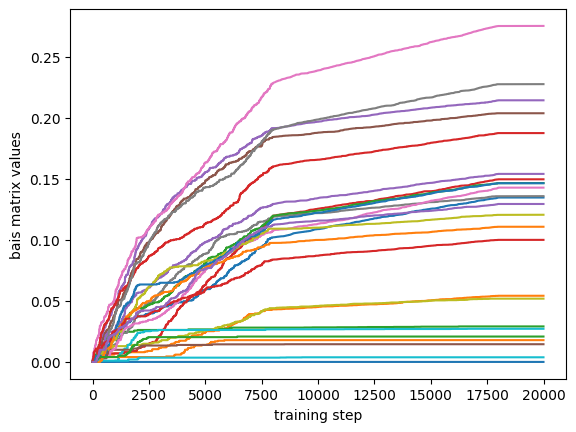

In [65]:
for i in np.arange(25):
    plt.plot(np.reshape(som_model_simple.bais_matrix_history, (7*7, (som_model_simple.bais_matrix_history).shape[-1]))[i])
    
#plt.xlim(0,1000)
plt.xlabel("training step")
plt.ylabel("bais matrix values")

Text(0, 0.5, 'Supression matrix values')

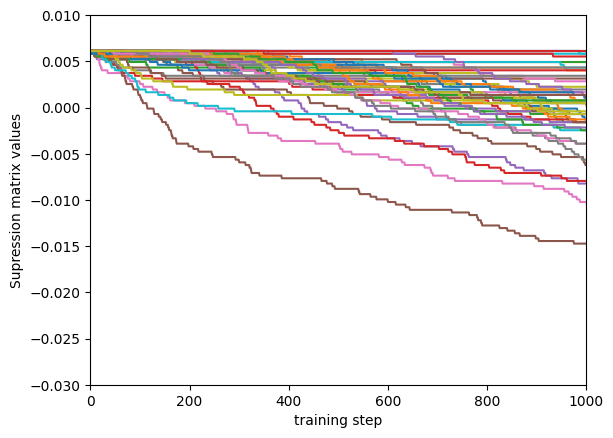

In [67]:
#ax, plt = plt.figure(s)
for i in np.arange(7*7):
    plt.plot(supression_mat_vector[i])
    
plt.xlim(0,1000)
plt.ylim(-0.03,0.01)
plt.xlabel("training step")
plt.ylabel("Supression matrix values")

Text(0, 0.5, 'bais matrix values')

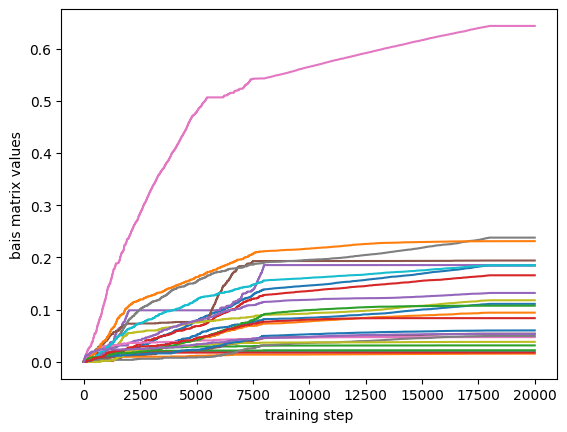

In [37]:
for i in np.arange(25):
    plt.plot(np.reshape(som_model_simple.bais_matrix_history, (7*7, (som_model_simple.bais_matrix_history).shape[-1]))[i])
    
#plt.xlim(0,1000)
plt.xlabel("training step")
plt.ylabel("bais matrix values")

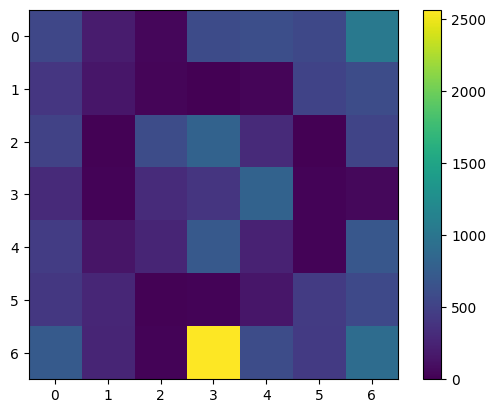

In [68]:
plt.imshow(som_model_simple.weight_cube_history, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

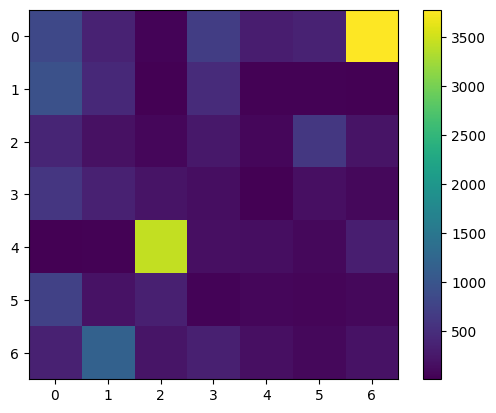

In [38]:
plt.imshow(som_model_simple.weight_cube_history, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

In [19]:
som_model_simple.weight_cube_history # not doing the whole (spreading out how wins) very well

array([[3.000e+00, 1.230e+02, 3.803e+03, 2.680e+02, 2.170e+02, 1.430e+02,
        3.490e+02],
       [1.700e+02, 0.000e+00, 2.510e+02, 4.700e+01, 2.120e+03, 1.210e+02,
        1.000e+02],
       [4.232e+03, 5.100e+01, 4.100e+01, 2.510e+02, 1.860e+02, 1.840e+02,
        1.110e+02],
       [3.700e+01, 5.000e+00, 3.600e+01, 2.690e+02, 1.800e+02, 8.200e+01,
        1.140e+02],
       [1.270e+03, 5.420e+02, 4.000e+00, 1.600e+02, 1.780e+02, 1.140e+02,
        1.430e+02],
       [5.370e+02, 3.340e+02, 1.100e+01, 1.080e+02, 9.500e+01, 8.100e+01,
        1.510e+02],
       [1.103e+03, 6.310e+02, 7.000e+01, 3.000e+02, 2.850e+02, 1.760e+02,
        2.130e+02]])

In [17]:
som_model_simple.weight_cube_history

array([[4.314e+03, 4.590e+02, 6.300e+01, 8.110e+02, 6.960e+02, 4.390e+02,
        2.732e+03],
       [3.550e+02, 3.430e+02, 3.640e+02, 1.200e+01, 4.730e+02, 3.000e+02,
        3.650e+02],
       [6.400e+01, 1.580e+02, 2.180e+02, 2.280e+02, 3.000e+00, 1.920e+02,
        1.190e+02],
       [7.900e+02, 2.230e+02, 1.610e+02, 9.800e+01, 2.880e+02, 1.300e+01,
        1.530e+02],
       [2.917e+03, 1.820e+02, 1.640e+02, 1.460e+02, 1.210e+02, 7.700e+01,
        1.600e+02],
       [1.690e+02, 2.230e+02, 2.030e+02, 1.550e+02, 5.800e+01, 1.570e+02,
        0.000e+00],
       [3.660e+02, 5.800e+01, 1.000e+02, 1.400e+02, 8.400e+01, 8.600e+01,
        0.000e+00]])

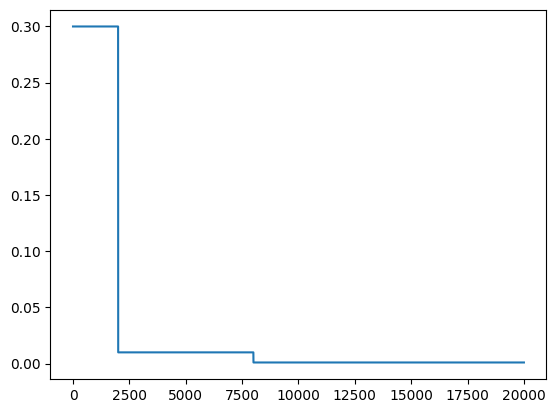

In [18]:
plt.plot(som_model_simple.learning_rate_history)

Here we plot a cSOM with a neighborhood radius of 2, interestingly enough it almost looks like this weights are pointing to the sections between the clusters instead of on the clusters, at least for the top 2, the bottom two seem to be normalish

In [24]:
(1/(7*7)) * 0.3

0.006122448979591836

In [25]:
som_model_simple.suppresion_matrix_history[:,:,1]

array([[0.00612245, 0.00612245, 0.00582245, 0.00612245, 0.00612245,
        0.00612245, 0.00612245],
       [0.00612245, 0.00612245, 0.00612245, 0.00612245, 0.00612245,
        0.00612245, 0.00612245],
       [0.00612245, 0.00612245, 0.00612245, 0.00612245, 0.00612245,
        0.00612245, 0.00612245],
       [0.00612245, 0.00612245, 0.00612245, 0.00612245, 0.00612245,
        0.00612245, 0.00612245],
       [0.00612245, 0.00612245, 0.00612245, 0.00612245, 0.00612245,
        0.00612245, 0.00612245],
       [0.00612245, 0.00612245, 0.00612245, 0.00582245, 0.00612245,
        0.00612245, 0.00612245],
       [0.00612245, 0.00612245, 0.00612245, 0.00612245, 0.00612245,
        0.00612245, 0.00612245]])

Text(0.5, 1.0, 'cSOM, neighborhood radius = 2')

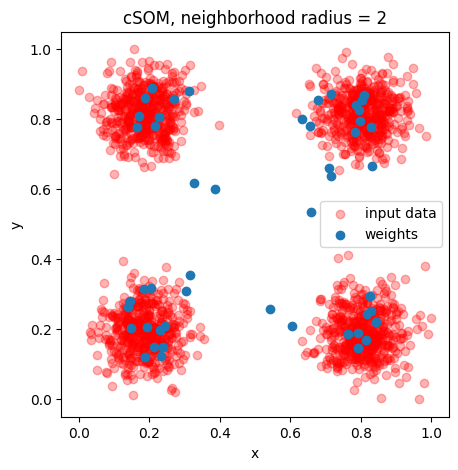

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(gaussian_data_4_classes_norm[:, 0], 
            gaussian_data_4_classes_norm[:, 1], alpha=0.3,
           color = 'red', label = "input data")
plt.scatter(som_model_simple.weight_cube.reshape(7*7,2)[:,0],
           som_model_simple.weight_cube.reshape(7*7,2)[:,1],
           label = "weights")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("cSOM, neighborhood radius = 2") # exponential

Text(0.5, 1.0, 'cSOM, neighborhood radius = 2')

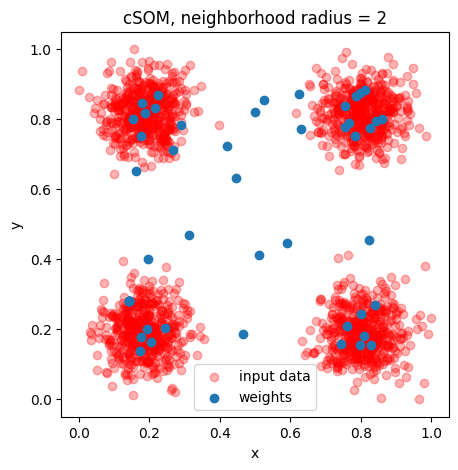

In [69]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(gaussian_data_4_classes_norm[:, 0], 
            gaussian_data_4_classes_norm[:, 1], alpha=0.3,
           color = 'red', label = "input data")
plt.scatter(som_model_simple.weight_cube.reshape(7*7,2)[:,0],
           som_model_simple.weight_cube.reshape(7*7,2)[:,1],
           label = "weights")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("cSOM, neighborhood radius = 2") # exponential

Text(0.5, 1.0, 'cSOM, neighborhood radius = 2 (geometric_series)')

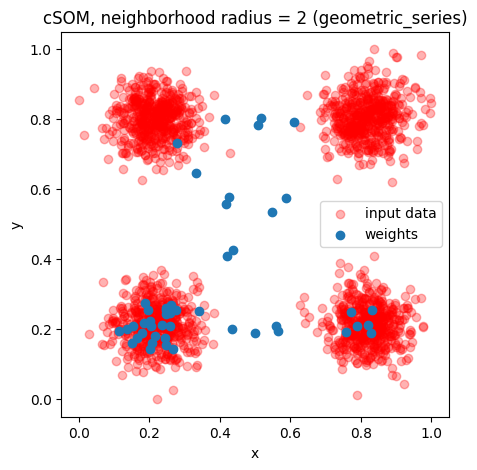

In [17]:
# retried, this set of parameters is not coinsistent
fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(gaussian_data_4_classes_norm[:, 0], 
            gaussian_data_4_classes_norm[:, 1], alpha=0.3,
           color = 'red', label = "input data")
plt.scatter(som_model_simple.weight_cube.reshape(7*7,2)[:,0],
           som_model_simple.weight_cube.reshape(7*7,2)[:,1],
           label = "weights")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("cSOM, neighborhood radius = 2 (geometric_series)")

Text(0.5, 1.0, 'cSOM, neighborhood radius = 2 (geometric_series)')

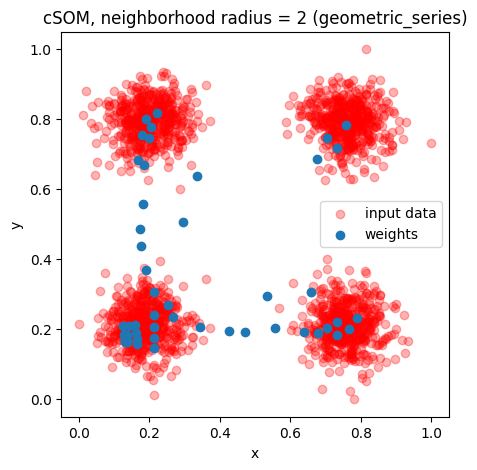

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(gaussian_data_4_classes_norm[:, 0], 
            gaussian_data_4_classes_norm[:, 1], alpha=0.3,
           color = 'red', label = "input data")
plt.scatter(som_model_simple.weight_cube.reshape(7*7,2)[:,0],
           som_model_simple.weight_cube.reshape(7*7,2)[:,1],
           label = "weights")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("cSOM, neighborhood radius = 2 (geometric_series)")

Text(0, 0.5, 'y')

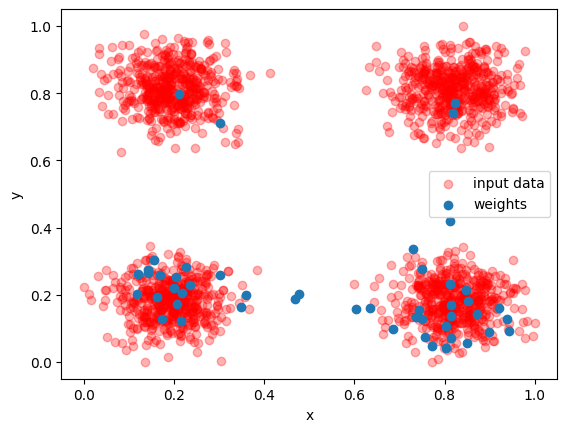

In [70]:
plt.scatter(gaussian_data_4_classes_norm[:, 0], 
            gaussian_data_4_classes_norm[:, 1], alpha=0.3,
           color = 'red', label = "input data")
plt.scatter(som_model_simple.weight_cube.reshape(7*7,2)[:,0],
           som_model_simple.weight_cube.reshape(7*7,2)[:,1],
           label = "weights")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

Text(0, 0.5, 'y')

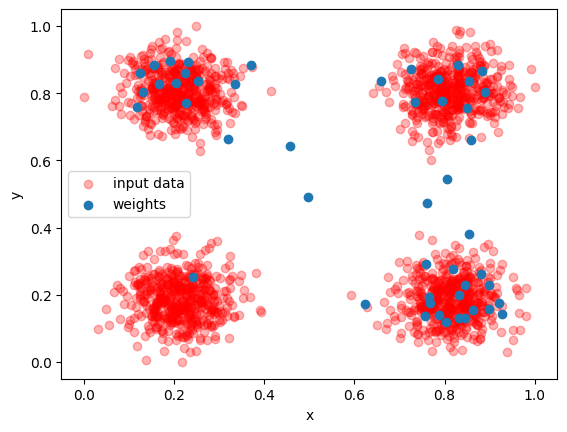

In [43]:
plt.scatter(gaussian_data_4_classes_norm[:, 0], 
            gaussian_data_4_classes_norm[:, 1], alpha=0.3,
           color = 'red', label = "input data")
plt.scatter(som_model_simple.weight_cube.reshape(7*7,2)[:,0],
           som_model_simple.weight_cube.reshape(7*7,2)[:,1],
           label = "weights")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

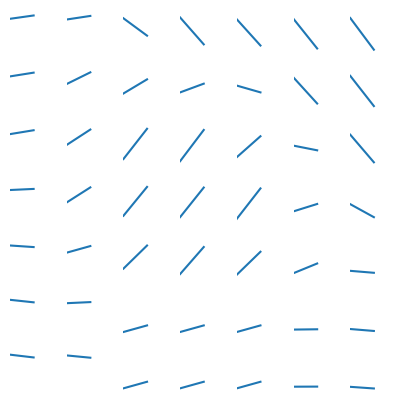

In [70]:
plot_SOM_gird_neurons(som_model_simple.weight_cube)

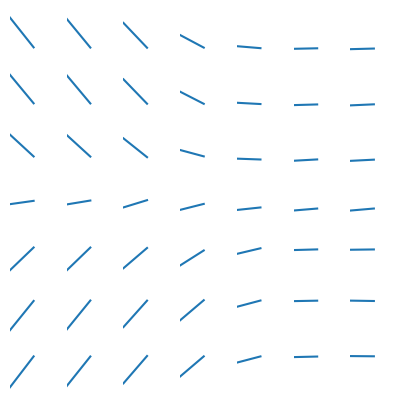

In [26]:
plot_SOM_gird_neurons(som_model_simple.weight_cube)

Text(0.5, 1.0, 'n_iter = 10000')

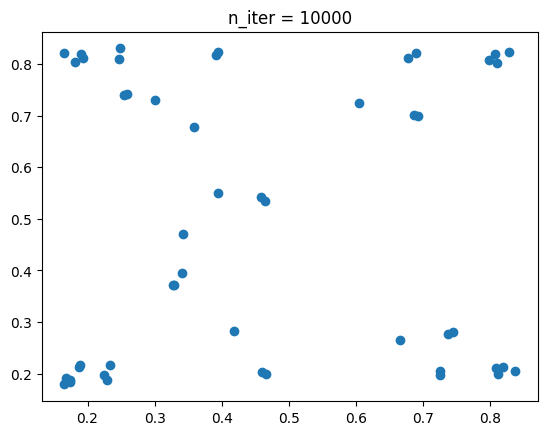

In [27]:
plt.scatter(som_model_simple.weight_cube.reshape(7*7,2)[:,0],
           som_model_simple.weight_cube.reshape(7*7,2)[:,1],)
plt.title("n_iter = 10000")

In [45]:
# Lets try to change the data:/
n_samples = 2000  # Total number of samples
centers = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])  # Centers of the 4 Gaussian distributions
std_dev = 0.1  # Standard deviation of the Gaussian distributions
n_centers = len(centers)
samples_per_center = n_samples // n_centers

data = []
for center in centers:
    samples = np.random.normal(loc=center, scale=std_dev, size=(samples_per_center, 2))
    data.append(samples)

# Combine all samples into a single array
gaussian_data_4_classes = np.vstack(data)

gaussian_data_4_classes_norm = affine_transform(gaussian_data_4_classes, -1, 1)

In [46]:
som_model_simple.train(gaussian_data_4_classes_norm)

Text(0, 0.5, 'y')

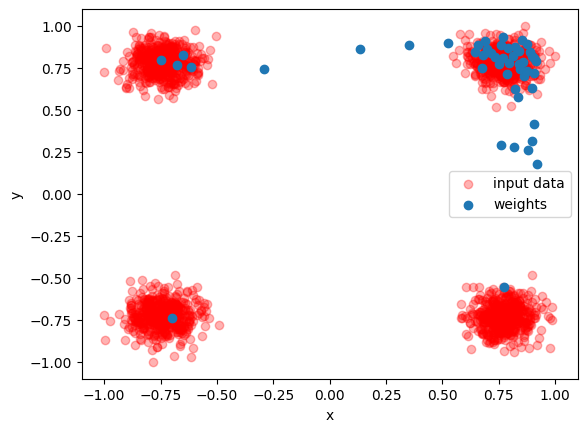

In [47]:
plt.scatter(gaussian_data_4_classes_norm[:, 0], 
            gaussian_data_4_classes_norm[:, 1], alpha=0.3,
           color = 'red', label = "input data")
plt.scatter(som_model_simple.weight_cube.reshape(7*7,2)[:,0],
           som_model_simple.weight_cube.reshape(7*7,2)[:,1],
           label = "weights")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

In [17]:
plt.scatter(som_model_simple.weight_cube.reshape(25,2)[:,0],
           som_model_simple.weight_cube.reshape(25,2)[:,1],)
plt.title("n_iter = 100")

ValueError: cannot reshape array of size 98 into shape (25,2)

Text(0.5, 1.0, 'n_iter = 1000')

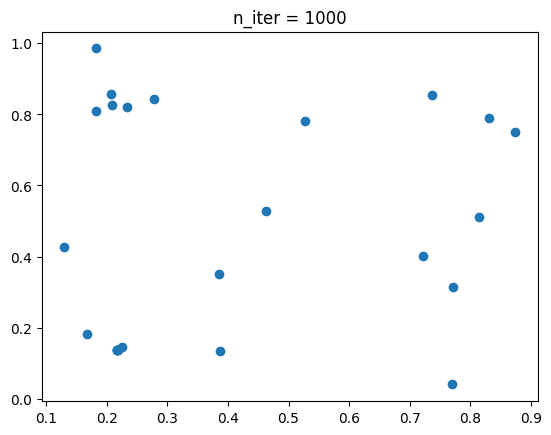

In [105]:
plt.scatter(som_model_simple.weight_cube.reshape(25,2)[:,0],
           som_model_simple.weight_cube.reshape(25,2)[:,1],)
plt.title("n_iter = 1000")

Text(0.5, 1.0, 'n_iter = 1000')

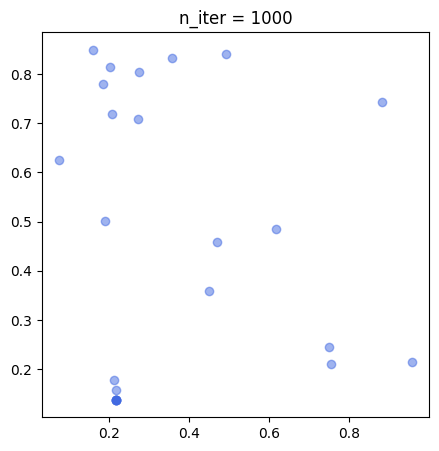

In [63]:
plt.subplots(figsize=(5, 5))

plt.scatter(som_model_simple.weight_cube.reshape(25,2)[:,0],
           som_model_simple.weight_cube.reshape(25,2)[:,1],
           alpha = 0.5, color = 'royalblue')
plt.title("n_iter = 1000")

Text(0.5, 1.0, 'n_iter = 10000')

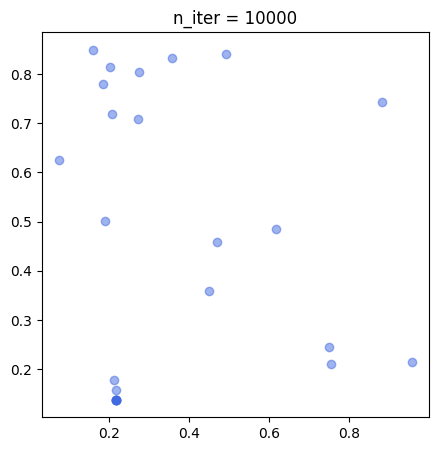

In [64]:
plt.subplots(figsize=(5, 5))

plt.scatter(som_model_simple.weight_cube.reshape(25,2)[:,0],
           som_model_simple.weight_cube.reshape(25,2)[:,1],
           alpha = 0.5, color = 'royalblue')
plt.title("n_iter = 10000")

In [65]:
np.min(gaussian_data_4_classes_norm)

np.float64(0.0)

In [66]:
(som_model_simple.bais_matrix).shape[-1]

5

In [67]:
som_model_simple.weight_cube.reshape(25,2)[:,1]

array([0.50046919, 0.2456628 , 0.13806264, 0.13806264, 0.74380166,
       0.84929979, 0.45823955, 0.13806851, 0.13806592, 0.2097713 ,
       0.81364518, 0.78070496, 0.13837674, 0.13819696, 0.2145616 ,
       0.83355238, 0.80449651, 0.17857315, 0.15874042, 0.62631669,
       0.70787633, 0.84107535, 0.48554356, 0.71791753, 0.35831187])

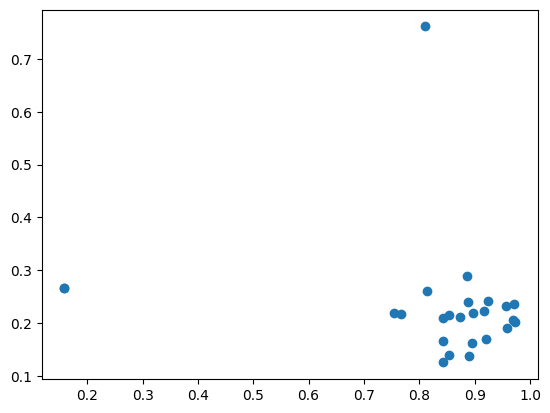

In [26]:
plt.scatter(som_model_simple.weight_cube.reshape(25,2)[:,0],
           som_model_simple.weight_cube.reshape(25,2)[:,1],)

In [17]:
bais_mat_vector = som_model_simple.bais_matrix_history.reshape(7*7,(som_model_simple.bais_matrix_history).shape[-1])

In [28]:
supression_mat_vector = som_model_simple.suppresion_matrix_history.reshape(7*7,(som_model_simple.suppresion_matrix_history).shape[-1])

Text(0, 0.5, 'bais matrix values')

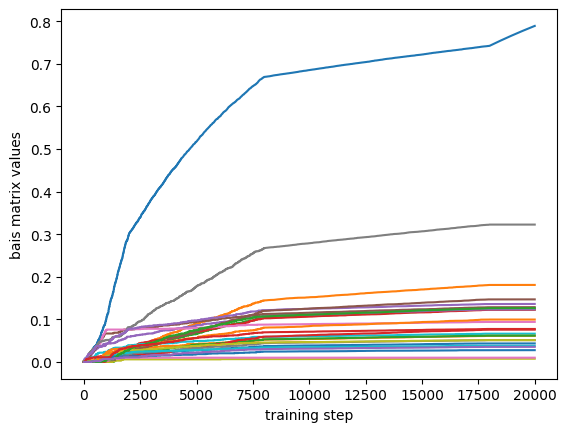

In [38]:
for i in np.arange(25):
    plt.plot(bais_mat_vector[i])
    
#plt.xlim(0,1000)
plt.xlabel("training step")
plt.ylabel("bais matrix values")
#plt.title("currently best working")

Text(0, 0.5, 'bais matrix values')

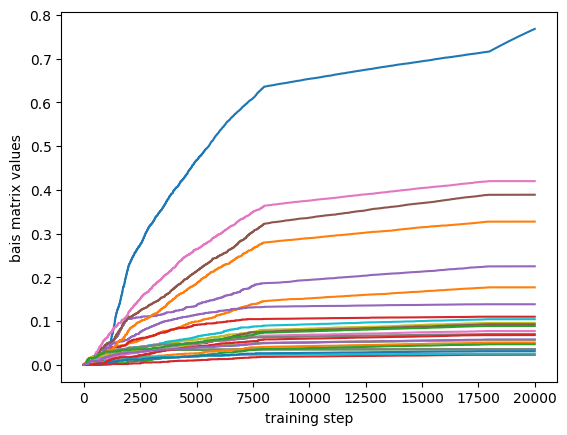

In [19]:
for i in np.arange(25):
    plt.plot(bais_mat_vector[i])
    
#plt.xlim(0,1000)
plt.xlabel("training step")
plt.ylabel("bais matrix values")

Text(0, 0.5, 'bais matrix values')

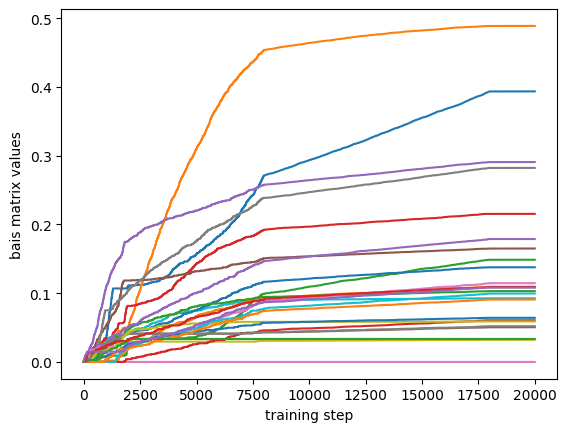

In [26]:
for i in np.arange(25):
    plt.plot(bais_mat_vector[i])
    
#plt.xlim(0,1000)
plt.xlabel("training step")
plt.ylabel("bais matrix values")

In [27]:
supression_mat_vector

array([[ 0.00612245,  0.00612245,  0.00612245, ..., -0.01866573,
        -0.01866573, -0.01866573],
       [ 0.00612245,  0.00612245,  0.00612245, ..., -0.02342915,
        -0.02342915, -0.02342915],
       [ 0.00612245,  0.00612245,  0.00612245, ..., -0.00641656,
        -0.00641656, -0.00641656],
       ...,
       [ 0.00612245,  0.00582245,  0.00582245, ..., -0.0022069 ,
        -0.0022069 , -0.0022069 ],
       [ 0.00612245,  0.00612245,  0.00612245, ..., -0.00149979,
        -0.00149979, -0.00149979],
       [ 0.00612245,  0.00612245,  0.00612245, ..., -0.01139173,
        -0.01139549, -0.01139925]])

Text(0.5, 1.0, 'cumulative suppresion term')

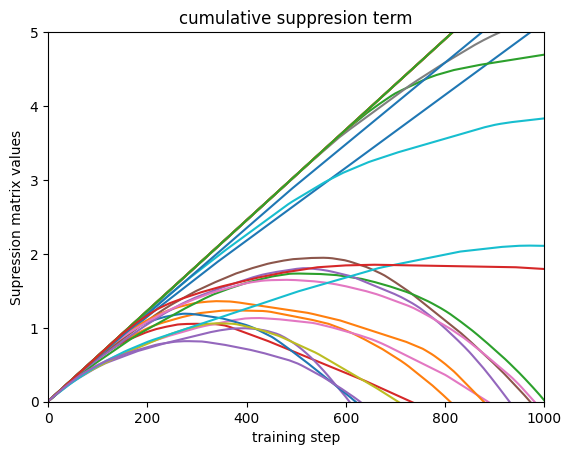

In [27]:
for i in np.arange(25):
    plt.plot(supression_mat_vector[i])
    
plt.xlim(0,1000)
plt.ylim(0,5)
plt.xlabel("training step")
plt.ylabel("Supression matrix values")
plt.title("cumulative suppresion term")

Text(0, 0.5, 'Supression matrix values')

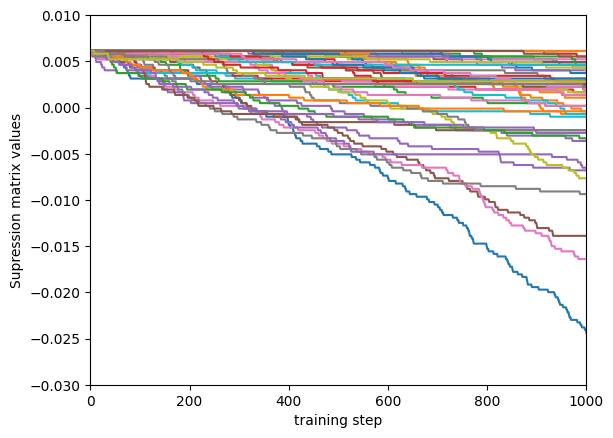

In [36]:
#ax, plt = plt.figure(s)
for i in np.arange(7*7):
    plt.plot(supression_mat_vector[i])
    
plt.xlim(0,1000)
plt.ylim(-0.03,0.01)
plt.xlabel("training step")
plt.ylabel("Supression matrix values")

Text(0, 0.5, 'Supression matrix values')

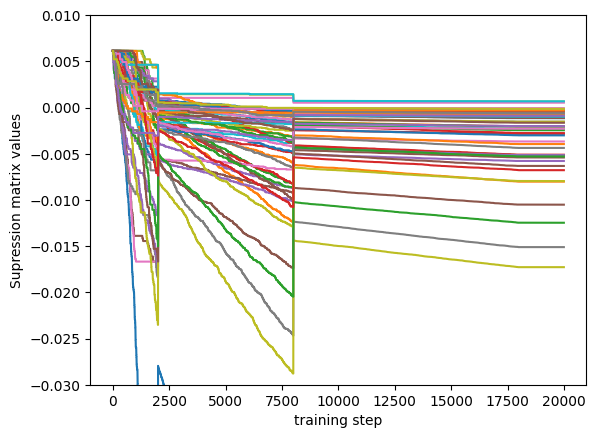

In [48]:
for i in np.arange(7*7):
    plt.plot(supression_mat_vector[i])
    
#plt.xlim(0,1000)
plt.ylim(-0.03,0.01)
plt.xlabel("training step")
plt.ylabel("Supression matrix values")

Text(0, 0.5, 'Supression matrix values')

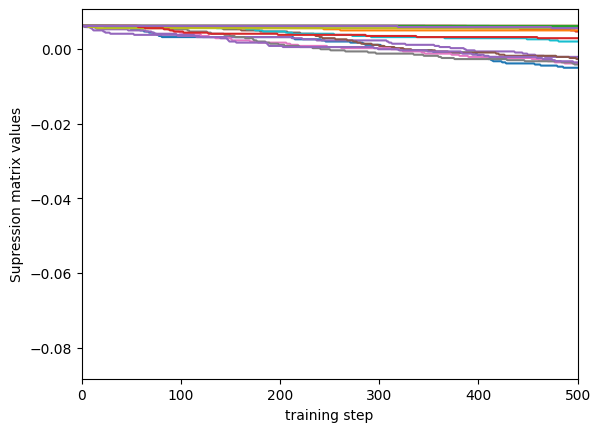

In [20]:
for i in np.arange(25):
    plt.plot(supression_mat_vector[i])
    
plt.xlim(0,500)
#plt.ylim(0,0.015)
plt.xlabel("training step")
plt.ylabel("Supression matrix values")

Text(0, 0.5, 'Supression matrix values')

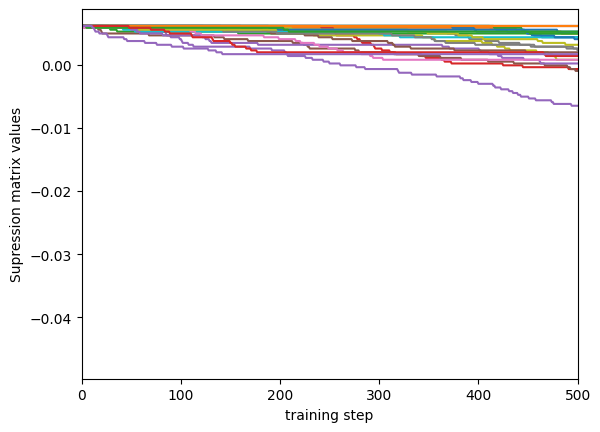

In [28]:
for i in np.arange(25):
    plt.plot(supression_mat_vector[i])
    
plt.xlim(0,500)
#plt.ylim(0,0.015)
plt.xlabel("training step")
plt.ylabel("Supression matrix values")

Text(0, 0.5, 'Supression matrix values')

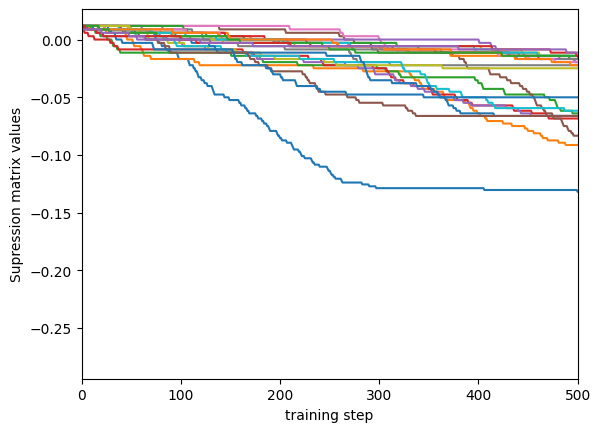

In [25]:
for i in np.arange(25):
    plt.plot(supression_mat_vector[i])
    
plt.xlim(0,500)
#plt.ylim(0,0.015)
plt.xlabel("training step")
plt.ylabel("Supression matrix values")

Text(0, 0.5, 'Supression matrix values')

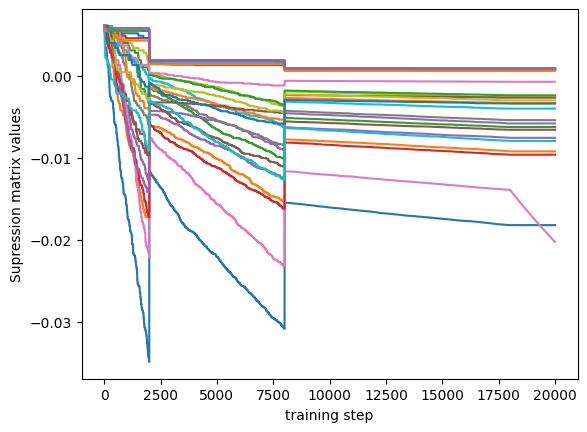

In [30]:
for i in np.arange(25):
    plt.plot(supression_mat_vector[i])
    
#plt.xlim(0,2000)
#plt.ylim(0,0.015)
plt.xlabel("training step")
plt.ylabel("Supression matrix values")

In [75]:
gaussian_data_4_classes_wcube = som_model_simple.weight_cube

In [29]:
len(gaussian_data_4_classes_norm)

2000

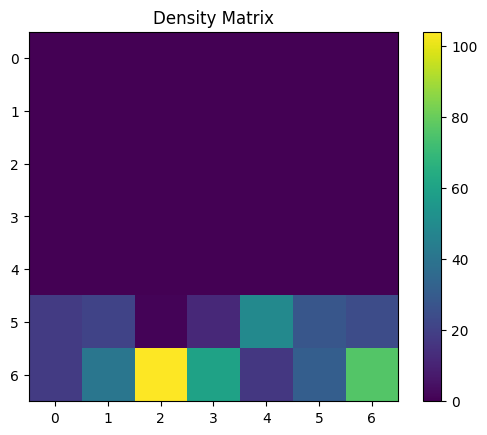

In [38]:
U_MAT = calculate_u_matrix(gaussian_data_4_classes_wcube)
DENS_MAT = calculate_density_matrix(gaussian_data_4_classes_wcube, 
                                    U_MAT, 
                                    gaussian_data_4_classes_norm[:500])
display_density_matrix(DENS_MAT)

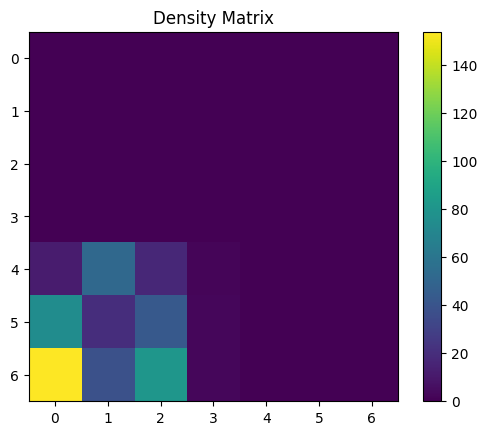

In [34]:
U_MAT = calculate_u_matrix(gaussian_data_4_classes_wcube)
DENS_MAT = calculate_density_matrix(gaussian_data_4_classes_wcube, 
                                    U_MAT, 
                                    gaussian_data_4_classes_norm[500:1000])
display_density_matrix(DENS_MAT)

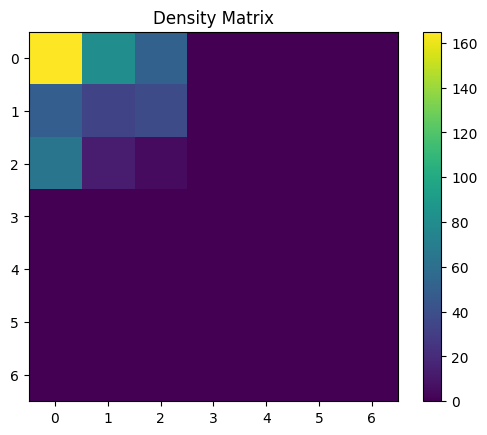

In [35]:
U_MAT = calculate_u_matrix(gaussian_data_4_classes_wcube)
DENS_MAT = calculate_density_matrix(gaussian_data_4_classes_wcube, 
                                    U_MAT, 
                                    gaussian_data_4_classes_norm[1000:1500])
display_density_matrix(DENS_MAT)

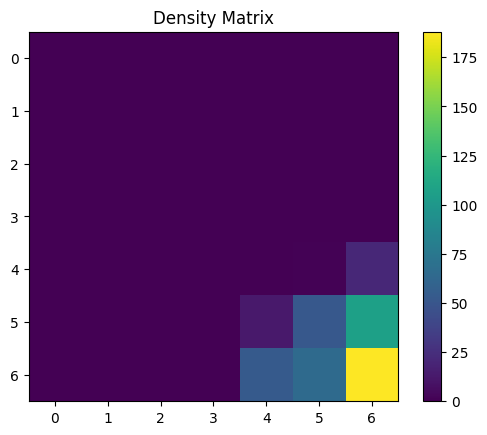

In [36]:
U_MAT = calculate_u_matrix(gaussian_data_4_classes_wcube)
DENS_MAT = calculate_density_matrix(gaussian_data_4_classes_wcube, 
                                    U_MAT, 
                                    gaussian_data_4_classes_norm[1500:])
display_density_matrix(DENS_MAT)

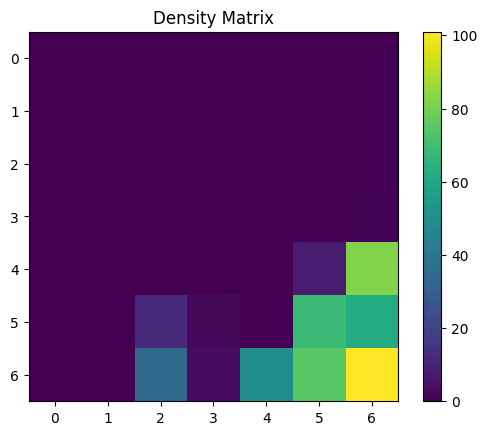

In [76]:
U_MAT = calculate_u_matrix(gaussian_data_4_classes_wcube)
DENS_MAT = calculate_density_matrix(gaussian_data_4_classes_wcube, 
                                    U_MAT, 
                                    gaussian_data_4_classes_norm[:500])
display_density_matrix(DENS_MAT)

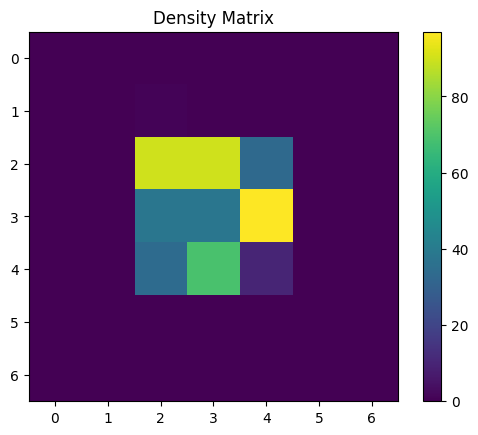

In [77]:
U_MAT = calculate_u_matrix(gaussian_data_4_classes_wcube)
DENS_MAT = calculate_density_matrix(gaussian_data_4_classes_wcube, 
                                    U_MAT, 
                                    gaussian_data_4_classes_norm[500:1000])
display_density_matrix(DENS_MAT)

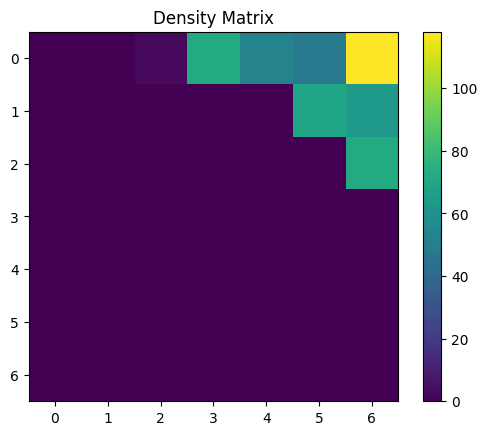

In [78]:
U_MAT = calculate_u_matrix(gaussian_data_4_classes_wcube)
DENS_MAT = calculate_density_matrix(gaussian_data_4_classes_wcube, 
                                    U_MAT, 
                                    gaussian_data_4_classes_norm[1000:1500])
display_density_matrix(DENS_MAT)

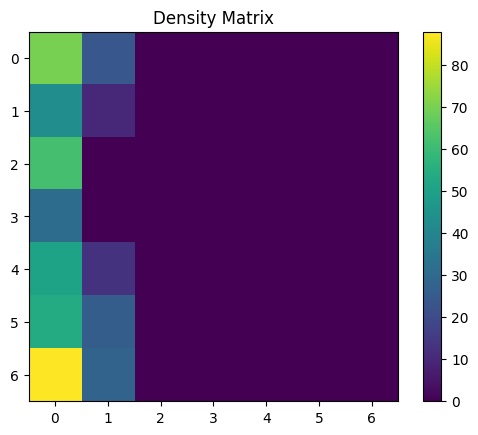

In [79]:
U_MAT = calculate_u_matrix(gaussian_data_4_classes_wcube)
DENS_MAT = calculate_density_matrix(gaussian_data_4_classes_wcube, 
                                    U_MAT, 
                                    gaussian_data_4_classes_norm[1500:])
display_density_matrix(DENS_MAT)

In [10]:
som_model_simple.weight_cube.reshape(-1, som_model_simple.weight_cube.shape[-1])

array([[0.52252776, 0.09188167],
       [0.29709486, 0.36326271],
       [0.36354551, 0.19518023],
       [0.80537997, 0.90949245],
       [0.09050786, 0.99652523],
       [0.05403491, 0.71701745],
       [0.06837312, 0.67419464],
       [0.42750227, 0.49652058],
       [0.8009388 , 0.68172682],
       [0.73486492, 0.33279753],
       [0.32226838, 0.78123722],
       [0.50686476, 0.5048668 ],
       [0.19582163, 0.9977195 ],
       [0.50555956, 0.03899522],
       [0.77185473, 0.04193766],
       [0.71524954, 0.17287507],
       [0.06808256, 0.2089964 ],
       [0.58475083, 0.47103631],
       [0.04948757, 0.20916526],
       [0.51106283, 0.5214096 ],
       [0.07654304, 0.26911575],
       [0.51279194, 0.56024076],
       [0.56096732, 0.47997732],
       [0.98713948, 0.34866745],
       [0.32900034, 0.74555621]])

In [10]:
test = np.zeros((5,5))

In [12]:
test.reshape(-1, test.shape[-1])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [43]:
def convert_to_float(arr):
    # Flatten the array to handle nested objects if any
    flat_arr = arr.ravel()
    
    # Convert all elements to float
    flat_arr = [float(element) for element in flat_arr]
    
    # Reshape back to the original shape
    return np.array(flat_arr).reshape(arr.shape)

In [44]:
penguins_df = pd.read_csv("../test_data/penguins.csv")
penguins_df = penguins_df.dropna()

input_data= np.array((penguins_df.to_numpy()[:,2],
                    penguins_df.to_numpy()[:,3],
                    penguins_df.to_numpy()[:,4],
                    penguins_df.to_numpy()[:,5]))

input_data = convert_to_float(input_data)
input_data = np.transpose(input_data)

In [45]:
data_normalized = affine_transform(input_data, 0, 1)

In [46]:
parameters_schedule = np.zeros(3, dtype=dtype)
parameters_schedule[0] = (2000, 0.7, 0.2, 3)
parameters_schedule[1] = (8000, 0.01, 0.1, 2)
parameters_schedule[2] = (40000, 0.001, 0.1, 1)

In [47]:
parameters_schedule = np.zeros(4, dtype=dtype)
parameters_schedule[0] = (2000, 0.3, 0.001, 0.3)
parameters_schedule[1] = (8000, 0.01, 0.0005, 0.1)
parameters_schedule[2] = (20000, 0.001, 0.0001, 0.05)
parameters_schedule[3] = (100000, 0.0001, 0.00005, 0.01)

In [48]:
som_model_simple = SOM(x_dim = 7, y_dim = 7, input_dim = 4, n_iter=40000,
                   learning_parameters=parameters_schedule, som_type = "cSOM",
                       neighborhood_decay = 'exponential',
                   decay_type='schedule', mode = "online", #neighborhood_decay = "exponential"
                       save_weight_cube_history = True
                   )

In [49]:
som_model_simple.train(data_normalized)

In [50]:
wcube = som_model_simple.weight_cube

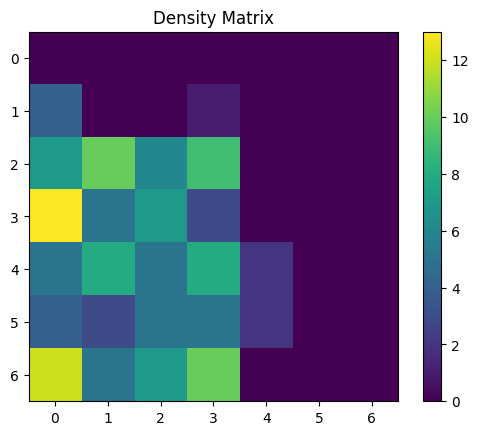

In [51]:
U_MAT = calculate_u_matrix(wcube)
DENS_MAT = calculate_density_matrix(wcube, U_MAT, data_normalized[:146])
display_density_matrix(DENS_MAT)

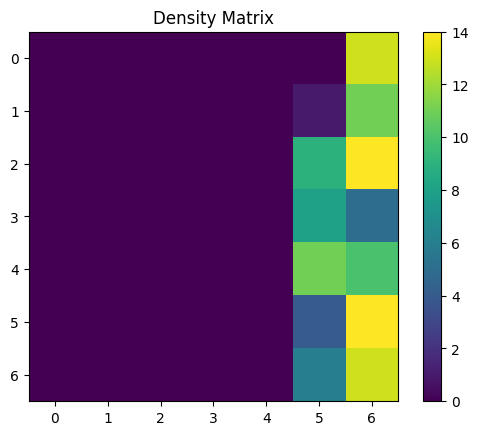

In [52]:
U_MAT = calculate_u_matrix(wcube)
DENS_MAT = calculate_density_matrix(wcube, U_MAT, data_normalized[146:146+119])
display_density_matrix(DENS_MAT)

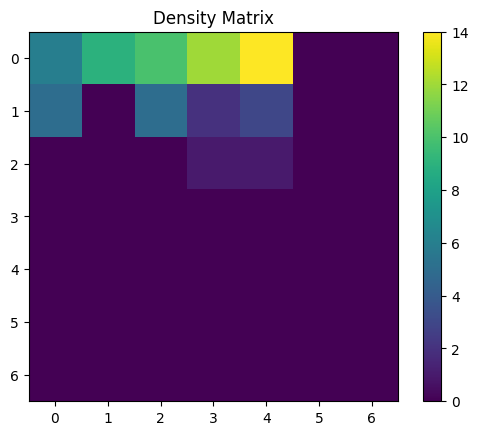

In [53]:
U_MAT = calculate_u_matrix(wcube)
DENS_MAT = calculate_density_matrix(wcube, U_MAT, data_normalized[146+119:])
display_density_matrix(DENS_MAT)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from typing import Union

def plot_SOM_gird_neurons(weight_cube):
    """
    This function take in a nunr file from NeuroScope and converts it into a useful format to us
    Then it uses the data in the nunr file to identify which data samples belong to each PE
    Finally it takes this data and plots it such that we can overlay any data we want.

    input_data:      waveforms (peaks, peaklets)
    grid_x_dim:      SOM x-dimension [list of x dim per sample]
    grid_y_dim:      SOM y-dimension [same as above]
    x_dim_data_cube: x-dimension of the input data cube for the SOM
    output_img:      name of file to save the image to
    is_struct_array: does the data need to be accessed as peaks['data']?
    """
    
    xgrid, ygrid, data_dim = np.shape(weight_cube)
    
    # Plotting section
    fig, ax = plt.subplots(nrows=ygrid, ncols=xgrid, figsize=(5, 5))

    a = 1
    for i in np.arange(ygrid):
        for j in np.arange(xgrid):
            ax[j,i].plot(weight_cube[j,i,:])
            ax[i,j].axis('off')
            ax[i,j].set_xlim(0, data_dim)
            ax[i,j].set_ylim(0, 1)

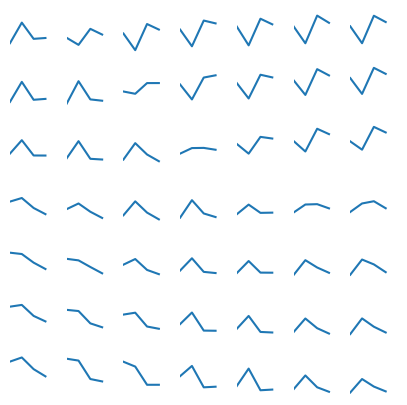

In [66]:
plot_SOM_gird_neurons(wcube)

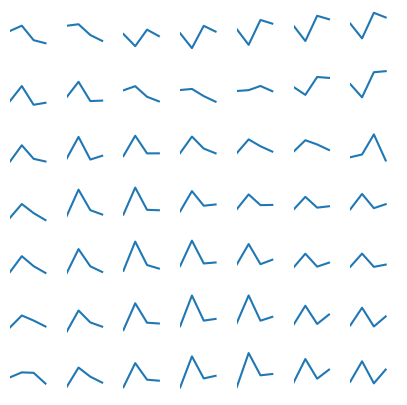

In [51]:
plot_SOM_gird_neurons(wcube)

In [52]:
bais_mat_vector = som_model_simple.bais_matrix_history.reshape(7*7,(som_model_simple.bais_matrix_history).shape[-1])

Text(0, 0.5, 'bais matrix values')

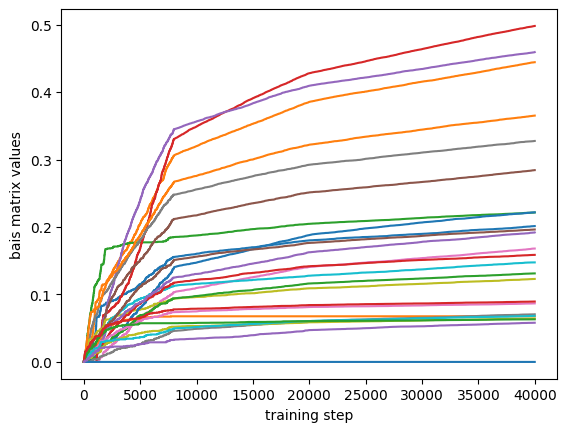

In [53]:
for i in np.arange(25):
    plt.plot(bais_mat_vector[i])
    
#plt.xlim(0,1000)
plt.xlabel("training step")
plt.ylabel("bais matrix values")